# Import necessary libraries

Accuracy: 20.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         0
           4       0.67      0.40      0.50         5

    accuracy                           0.20        10
   macro avg       0.13      0.08      0.10        10
weighted avg       0.33      0.20      0.25        10

Color: 0.1287
Weight(g): 0.3029
Sweetness(%): 0.3150
Size(cm): 0.2534


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

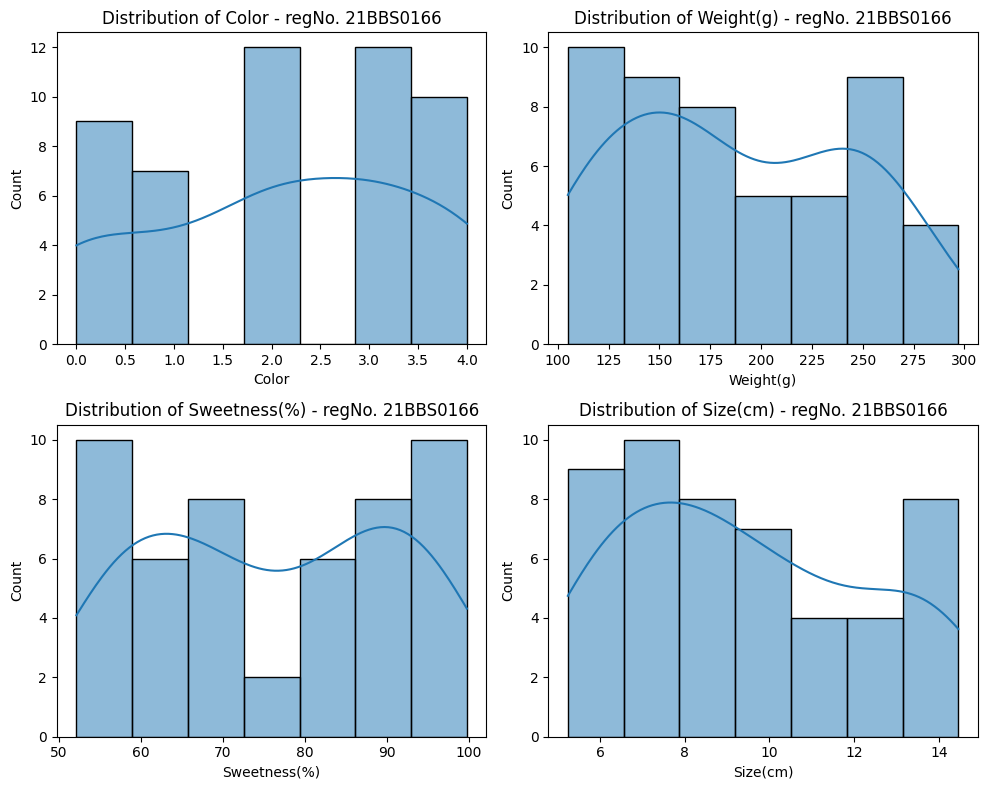

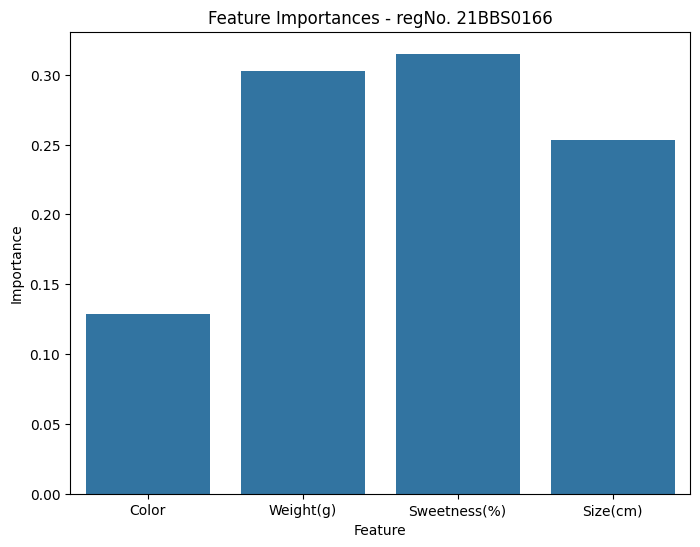

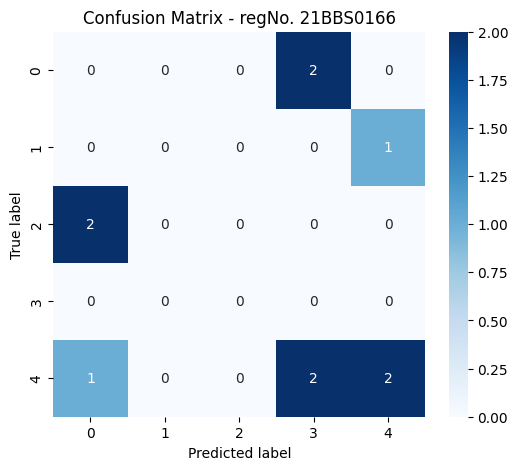

In [73]:
# Re-running the code to meet user's requirements after environment reset

# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



# Creating a DataFrame
df = pd.read_csv("3.Fruit_dataset.csv")

# Encode the categorical 'Fruit' and 'Color' columns
df['Fruit'] = df['Fruit'].astype('category').cat.codes
df['Color'] = df['Color'].astype('category').cat.codes

# Separate features and target variable
X = df[['Color', 'Weight(g)', 'Sweetness(%)', 'Size(cm)']]  # Features
y = df['Fruit']  # Target (Fruit types)

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature importance
feature_importances = rf_classifier.feature_importances_
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")

# Plot feature distribution
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

# Plot distribution of each feature
for i, col in enumerate(X.columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col} - regNo. 21BBS0166')

plt.tight_layout()
plt.show()

# Plot barplot of feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x=X.columns, y=feature_importances)
plt.title('Feature Importances - regNo. 21BBS0166')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - regNo. 21BBS0166')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
